**Nome: Felipe Bizzo ----------------------------------- RA: 1553518**

In [ ]:
!pip install pyromat
import pyromat as pm
import numpy as np
import matplotlib.pyplot as plt

air = pm.get('ig.air')
pm.config['unit_energy'] = 'kJ'
pm.config['unit_matter'] = 'kg'
pm.config['unit_pressure'] = 'kPa'
pm.config['unit_temperature'] = 'K'

# Exercício 9.36

In [2]:
kelvin = 273.15
pr = 12
p1 = 100
T1 = 20 + kelvin
p2 = pr * p1
p3 = p2
T3 = 1100 + kelvin
m = 10
k = 1.4
kzin = (k-1)/k
cpo = 1.004

(1) ---|Compressor|---> (2) ---|Combustor|---> (3) ---|Turbina|
---> (4)

In [3]:
s1 = air.s(T1,p1)
T2 = T1*(pr)**kzin
print(f"T2 = {round(float(T2),1)} K")

wc = cpo*(T2-T1)
print(f"O trabalho no compressor é: {round(float(wc),3)} kJ/kg")

s3 = air.s(T3,p3)
s4 = s3           #Expansão isentrópica para p1
p4 = p1
T4 = T3*(p4/p3)**kzin
print(f"T4 = {round(float(T4),1)} K")

wt = cpo*(T3-T4)
print(f"O trabalho na turbina é: {round(float(wt),3)} kJ/kg")

qh = cpo*(T3-T2)
wnet = wt - wc
Wnet = m*wt

n = wnet / qh
print(f"A eficiência térmica é: {round(float(n),3)}%")

T2 = 596.2 K
O trabalho no compressor é: 304.311 kJ/kg
T4 = 675.1 K
O trabalho na turbina é: 700.823 kJ/kg
A eficiência térmica é: 0.508%


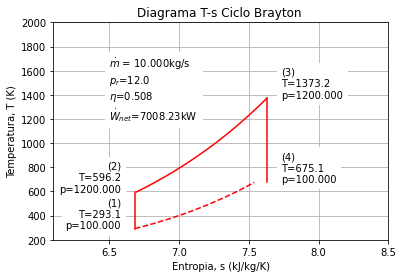

In [4]:
# Diagramas do processo
plt.close('all')
plt.figure(1)
# compressão isentrópica é uma linha vertical
plt.plot([s1,s1],[T1,T2],'r',linewidth=1.5)
# adição de calor de pressão constante
T = np.linspace(T2,T3,20)
plt.plot(air.s(T=T,p=p2),T,'r',linewidth=1.5)
# expansão isentrópica
plt.plot([s3,s3],[T3,T4],'r',linewidth=1.5)
# O processo de pseudo-rejeição de calor
T = np.linspace(T1,T4,20)
plt.plot(air.s(T=T,p=p1),T,'r--',linewidth=1.5)
# ajusta exibição dos eixos
ax = plt.gca()
ax.set_xlim([6.1,8.5])
ax.set_ylim([200,2000])
# adiciona nome dos eixos
plt.xlabel('Entropia, s (kJ/kg/K)')
plt.ylabel('Temperatura, T (K)')
plt.grid('on')
# Adiciona as etiquetas
plt.text(s1-.1,T1,'(1)\nT={:.1f}\np={:.3f}'.format(float(T1),float(p1)),
    ha='right',backgroundcolor='white')
plt.text(s1-.1,T2,'(2)\nT={:.1f}\np={:.3f}'.format(float(T2),float(p2)),
    ha='right',backgroundcolor='white')
plt.text(s3+.1,T3,'(3)\nT={:.1f}\np={:.3f}'.format(float(T3),float(p3)),
    ha='left',backgroundcolor='white')
plt.text(s3+.1,T4,'(4)\nT={:.1f}\np={:.3f}'.format(float(T4),float(p4)),
    ha='left',backgroundcolor='white')
# Adiciona o sumário
plt.text(6.5,1200,
"""$\dot{{m}}$ = {:.3f}kg/s
$p_r$={:.1f}
$\eta$={:.3f}
$\dot{{W}}_{{net}}$={:1}kW""".format(float(m),float(pr),float(n),round(float(Wnet),2)),
    backgroundcolor='white')
plt.title('Diagrama T-s Ciclo Brayton ')

plt.show()
#plt.show(block=False)